In [1]:
# 计算出错的测试用例的行号
result_c = open('result_c.txt')
result_f = open('result_f.txt')
lines1 = result_c.read().split('\n')[:-1]
lines2 = result_f.read().split('\n')[:-1]
cnt1 = 0
cnt2 = 0
right_test= []
wrong_test= []
for i, (line1, line2) in enumerate(zip(lines1, lines2)):
    if line1 != line2:
        cnt2 += 1
        wrong_test.append(i+1)
    else:
        cnt1 += 1
        right_test.append(i+1)
result_c.close()
result_f.close()
print(cnt1, cnt2)

146 54


In [3]:
# 提取gcov文件信息
import re
def gcov_extract(file):
    lines1 = file.read().replace("#####", '    0').split('\n')[:-1]
    # 去除不能执行的行
    lines2 = []
    for line in lines1:
        if '-' not in line:
            lines2.append(line)
    # 提取信息
    cnts = []
    row_nums = []
    for line in lines2:
        r = re.match(r".*?(\d+):.*?(\d+):", line)
        if r is not None:
            cnt = '1' if r.group(1)!='0' else '0'
            cnts.append(cnt)
            row_nums.append(r.group(2))
    # 存入字典
    dic = {}
    for row_num, cnt in zip(row_nums, cnts):
        dic[int(row_num)] = int(cnt)
    # 返回文本
    txt = str(dic).replace('{','').replace('}','').replace(',','\n').replace(' ','')
    return txt

for i in range(1,201):
    """得到两百个frequency文件"""
    gcov = open('./gcovFiles/%d.gcov' % i, encoding='utf-8')
    txt = gcov_extract(gcov)
    f = open('./frequencyFiles/%d.txt' % i, 'w', encoding='utf-8')
    f.write(txt)
    f.close()
    gcov.close()

In [5]:
import re
import pandas as pd
s = {}
# 初始化s
lines = open('./frequencyFiles/1.txt', encoding='utf-8').read().split('\n')
for line in lines:
    s[int(re.match(r'.*?(\d+):', line).group(1))] = [0,0,0,0] #[N_cf, N_cs, N_uf, N_us]
# 更新s
for i in range(1, 201):
    lines = open('./frequencyFiles/%d.txt' % i, encoding='utf-8').read().split('\n')
    if i in right_test:
       for line in lines:
            r = re.match(r'.*?(\d+):?(\d+)', line)
            row_num = int(r.group(1))
            execute = int(r.group(2))
            if execute == 1:
                s[row_num][1] += 1
            else:
                s[row_num][3] += 1
    elif i in wrong_test:
        for line in lines:
            r = re.match(r'.*?(\d+):?(\d+)', line)
            row_num = int(r.group(1))
            execute = int(r.group(2))
            if execute == 1:
                s[row_num][0] += 1
            else:
                s[row_num][2] += 1

# 参数计算
df = pd.DataFrame.from_dict(s, orient='index', dtype=None, columns=None)
df.columns = ['N_cf', 'N_cs', 'N_uf', 'N_us']
df['N_f'] = df['N_cf'] + df['N_uf']
df['N_s'] = df['N_cs'] + df['N_us']

# 可疑度指标生成
df['Tarantula'] = (df['N_cf']/df['N_f']) / (df['N_cf']/df['N_f'] + df['N_cs']/df['N_s'])
df['Goodman'] = (2*df['N_cf'] - df['N_uf'] - df['N_cs']) / (2*df['N_cf'] + df['N_uf'] + df['N_cs'])
df['Jaccard'] = df['N_cf'] / (df['N_cf'] + df['N_uf'] + df['N_cs'])
df['Anderberg'] = df['N_cf'] / (df['N_cf'] + 2*(df['N_uf'] + df['N_cs']))
df.to_excel('sus.xlsx')

In [6]:
# Tarantula
(df.sort_values('Tarantula', ascending=False).head(10)).sort_index()#.to_excel('Tarantula.xlsx')

,N_cf,N_cs,N_uf,N_us,N_f,N_s,Tarantula,Goodman,Jaccard,Anderberg
36,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234
147,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234
148,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234
149,45,42,0,79,45,121,0.742331,0.363636,0.517241,0.348837
151,49,67,5,79,54,146,0.664129,0.152941,0.404959,0.253886
153,49,67,5,79,54,146,0.664129,0.152941,0.404959,0.253886
155,28,1,26,145,54,146,0.986963,0.349398,0.509091,0.341463
209,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234
210,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234
211,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234


In [7]:
# Jaccard
(df.sort_values('Jaccard', ascending=False).head(10)).sort_index()#.to_excel('Jaccard.xlsx')

,N_cf,N_cs,N_uf,N_us,N_f,N_s,Tarantula,Goodman,Jaccard,Anderberg
36,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234
147,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234
148,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234
149,45,42,0,79,45,121,0.742331,0.363636,0.517241,0.348837
151,49,67,5,79,54,146,0.664129,0.152941,0.404959,0.253886
153,49,67,5,79,54,146,0.664129,0.152941,0.404959,0.253886
155,28,1,26,145,54,146,0.986963,0.349398,0.509091,0.341463
209,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234
210,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234
211,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234


In [8]:
# Goodman
(df.sort_values('Goodman', ascending=False).head(10)).sort_index()#.to_excel('Goodman.xlsx')

,N_cf,N_cs,N_uf,N_us,N_f,N_s,Tarantula,Goodman,Jaccard,Anderberg
36,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234
147,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234
148,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234
149,45,42,0,79,45,121,0.742331,0.363636,0.517241,0.348837
151,49,67,5,79,54,146,0.664129,0.152941,0.404959,0.253886
153,49,67,5,79,54,146,0.664129,0.152941,0.404959,0.253886
155,28,1,26,145,54,146,0.986963,0.349398,0.509091,0.341463
209,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234
210,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234
211,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234


In [9]:
# Anderberg
(df.sort_values('Anderberg', ascending=False).head(10)).sort_index()#.to_excel('Anderberg.xlsx')

,N_cf,N_cs,N_uf,N_us,N_f,N_s,Tarantula,Goodman,Jaccard,Anderberg
36,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234
147,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234
148,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234
149,45,42,0,79,45,121,0.742331,0.363636,0.517241,0.348837
151,49,67,5,79,54,146,0.664129,0.152941,0.404959,0.253886
153,49,67,5,79,54,146,0.664129,0.152941,0.404959,0.253886
155,28,1,26,145,54,146,0.986963,0.349398,0.509091,0.341463
209,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234
210,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234
211,54,67,0,79,54,146,0.685446,0.234286,0.446281,0.287234


In [142]:
df['index'] = df.index
df

,N_cf,N_cs,N_uf,N_us,N_f,N_s,Tarantula,Goodman,Jaccard,Anderberg,index
18,63,137,0,0,63,137,0.5,-0.041825,0.315,0.186944,18
19,63,137,0,0,63,137,0.5,-0.041825,0.315,0.186944,19
20,63,137,0,0,63,137,0.5,-0.041825,0.315,0.186944,20
22,63,137,0,0,63,137,0.5,-0.041825,0.315,0.186944,22
28,63,137,0,0,63,137,0.5,-0.041825,0.315,0.186944,28
...,...,...,...,...,...,...,...,...,...,...,...
216,63,137,0,0,63,137,0.5,-0.041825,0.315,0.186944,216
217,63,137,0,0,63,137,0.5,-0.041825,0.315,0.186944,217
220,63,137,0,0,63,137,0.5,-0.041825,0.315,0.186944,220
221,63,137,0,0,63,137,0.5,-0.041825,0.315,0.186944,221


<AxesSubplot:xlabel='index'>

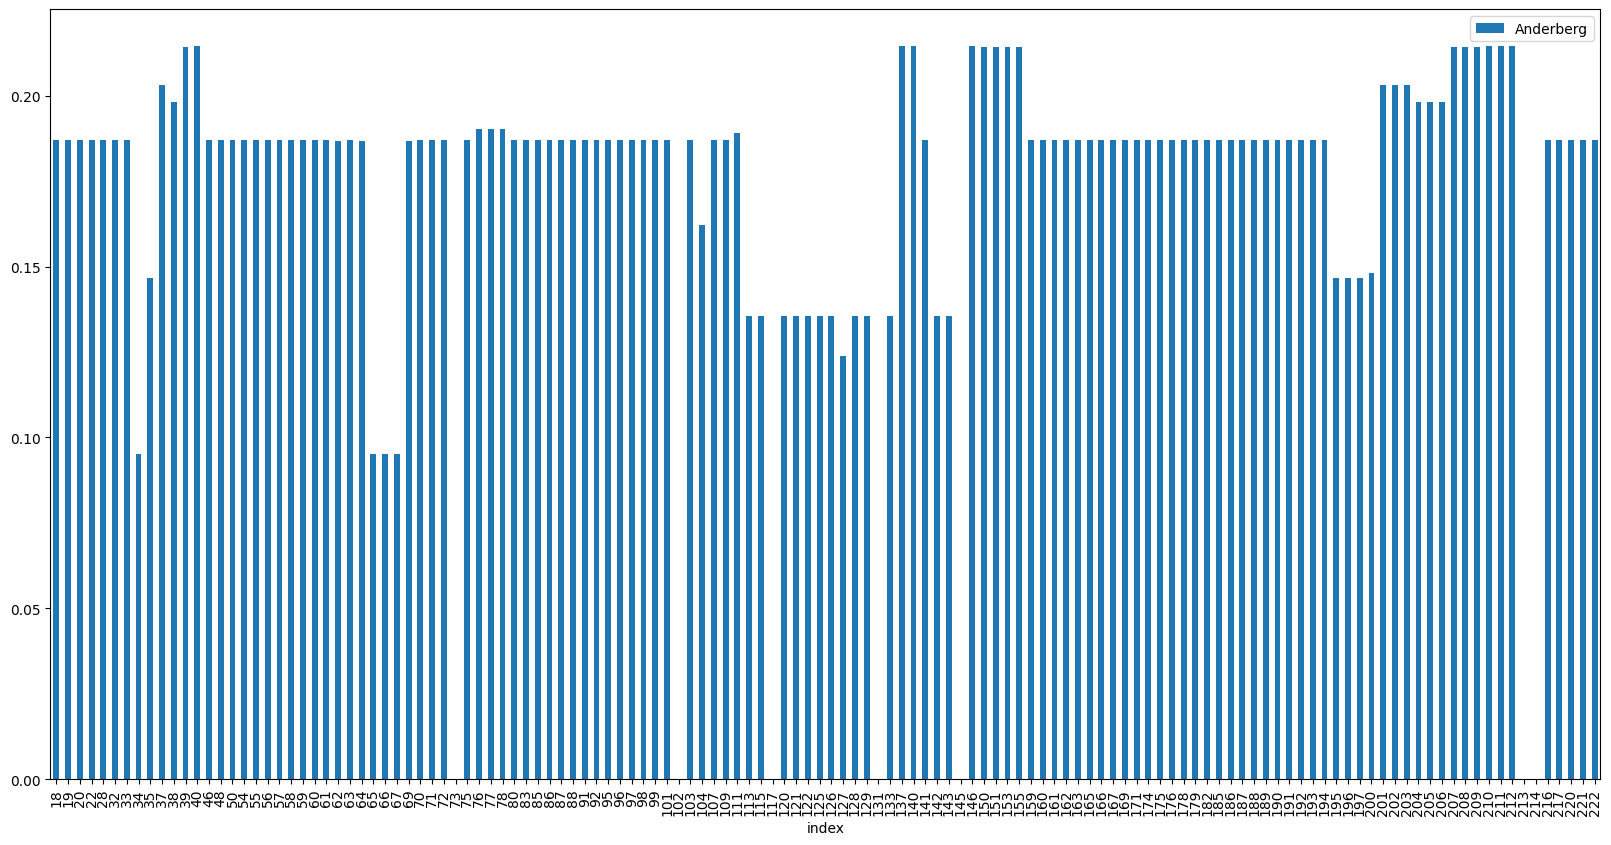

In [150]:
df.plot(x='index', y='Anderberg', kind = 'bar', figsize=(20,10))